In [37]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(42)

# Number of samples
n = 300

In [38]:
# Physical-like quantities

# seconds (integers)
time_s = np.arange(1, n+1) # 1 to 300 seconds

# speed (m/s) - correlated positively with time (increases of 1.4 m/s with time + noise)
speed_ms = 1.4 * time_s + np.random.normal(10, 5, n)

# mass (kg) - correlated negatively with time (decreases of 0.05 kg with time + noise)
mass_kg = 90 - 0.01 * time_s + np.random.normal(0.2, 0.2, n)

# temperature (C) - random, weak correlation with others
temperature_C = np.random.normal(37.5, 2, n)

# energy (J) - correlated with mass and speed
energy_J = mass_kg * (speed_ms**2) * 0.5 * 0.01

# noise variable - random, almost uncorrelated with others
noise_var = np.random.normal(0, 100, n)

# Build dataframe
df = pd.DataFrame({
    "Time_s": time_s,
    "Speed_ms": speed_ms,
    "Mass_kg": mass_kg,
    "Temperature_C": temperature_C,
    "Energy_J": energy_J,
    "Noise_var": noise_var
})

# Save to CSV
df.to_csv("artificial_dataset.csv", index=False)

In [39]:
# Display some stats
print(df.describe())

           Time_s    Speed_ms     Mass_kg  Temperature_C      Energy_J  \
count  300.000000  300.000000  300.000000     300.000000    300.000000   
mean   150.500000  220.672257   88.690702      37.664388  27920.159512   
std     86.746758  121.841714    0.903837       1.993353  24162.950391   
min      1.000000   12.108678   86.997773      32.106227     66.028867   
25%     75.750000  118.102667   87.928073      36.357050   6246.586950   
50%    150.500000  221.347316   88.650131      37.585481  21691.799099   
75%    225.250000  325.979346   89.487110      38.922939  46685.962239   
max    300.000000  433.148144   90.385533      42.764764  81871.937372   

        Noise_var  
count  300.000000  
mean     9.837329  
std    100.981357  
min   -289.625538  
25%    -55.613011  
50%     16.515653  
75%     74.942232  
max    243.975241  


In [41]:
# Correlation matrix:
print("\nCorrelation matrix:\n", df.corr())


Correlation matrix:
                  Time_s  Speed_ms   Mass_kg  Temperature_C  Energy_J  \
Time_s         1.000000  0.999187 -0.977256       0.097936  0.971563   
Speed_ms       0.999187  1.000000 -0.976766       0.096090  0.971996   
Mass_kg       -0.977256 -0.976766  1.000000      -0.100656 -0.946496   
Temperature_C  0.097936  0.096090 -0.100656       1.000000  0.119818   
Energy_J       0.971563  0.971996 -0.946496       0.119818  1.000000   
Noise_var     -0.013566 -0.010766  0.002667      -0.009147 -0.018299   

               Noise_var  
Time_s         -0.013566  
Speed_ms       -0.010766  
Mass_kg         0.002667  
Temperature_C  -0.009147  
Energy_J       -0.018299  
Noise_var       1.000000  


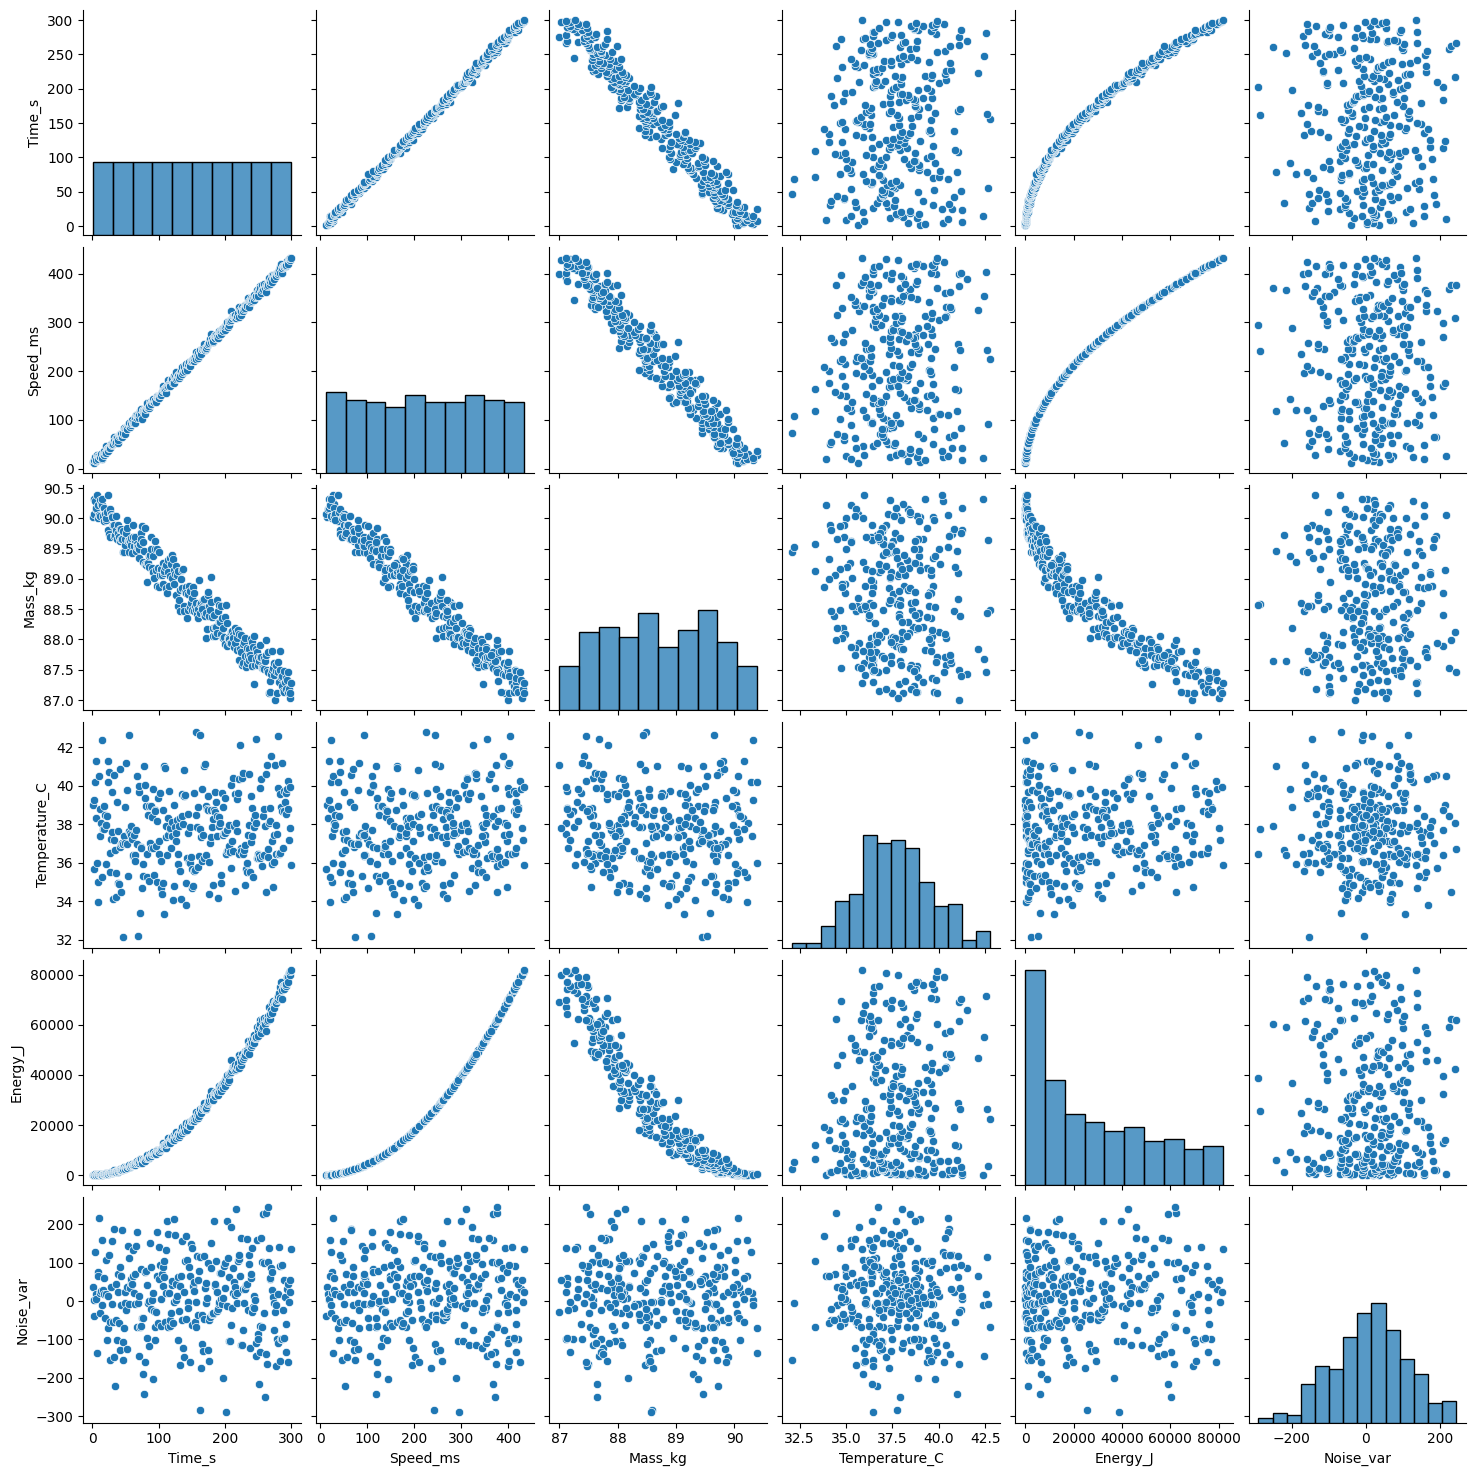

In [40]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()
